## Attribute Information

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

C:\Users\ANSHU\anaconda3\envs\GPU\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ANSHU\anaconda3\envs\GPU\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ANSHU\anaconda3\envs\GPU\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("D:\DATA SCIENCE\python\Dataset\\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.country.unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df["date_added"] = pd.to_datetime(df['date_added'], errors='coerce')

In [10]:
# df["date_added"] = pd.to_datetime(df.date_added)
df['added_year'] = df['date_added'].dt.year
df['added_day'] = df['date_added'].dt.day_name()
df['month'] = pd.DatetimeIndex(df['date_added']).month
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_day,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Saturday,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,Friday,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Friday,9.0


In [11]:
df['added_year'].fillna(df['added_year'].mean(), inplace=True)
df["month"].fillna(df['month'].mean(), inplace=True)
df["added_year"] = df["added_year"].astype(int)
df["month"] = df["month"].astype(int)
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_day,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Saturday,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,Friday,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Friday,9


In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year', 'added_day', 'month'],
      dtype='object')

In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
added_year         0
added_day         10
month              0
dtype: int64

In [14]:
df.fillna("Data Not Available", inplace=True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
added_year      0
added_day       0
month           0
dtype: int64

In [16]:
import pandas_profiling as pp
profile = pp.ProfileReport(df)

In [17]:
profile.to_file("Statistics.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 64.42it/s]


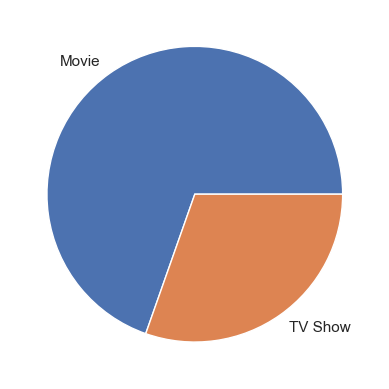

In [18]:
# Types of shows that are most available

plt.pie(df['type'].value_counts(), labels=['Movie', 'TV Show'])
plt.show()

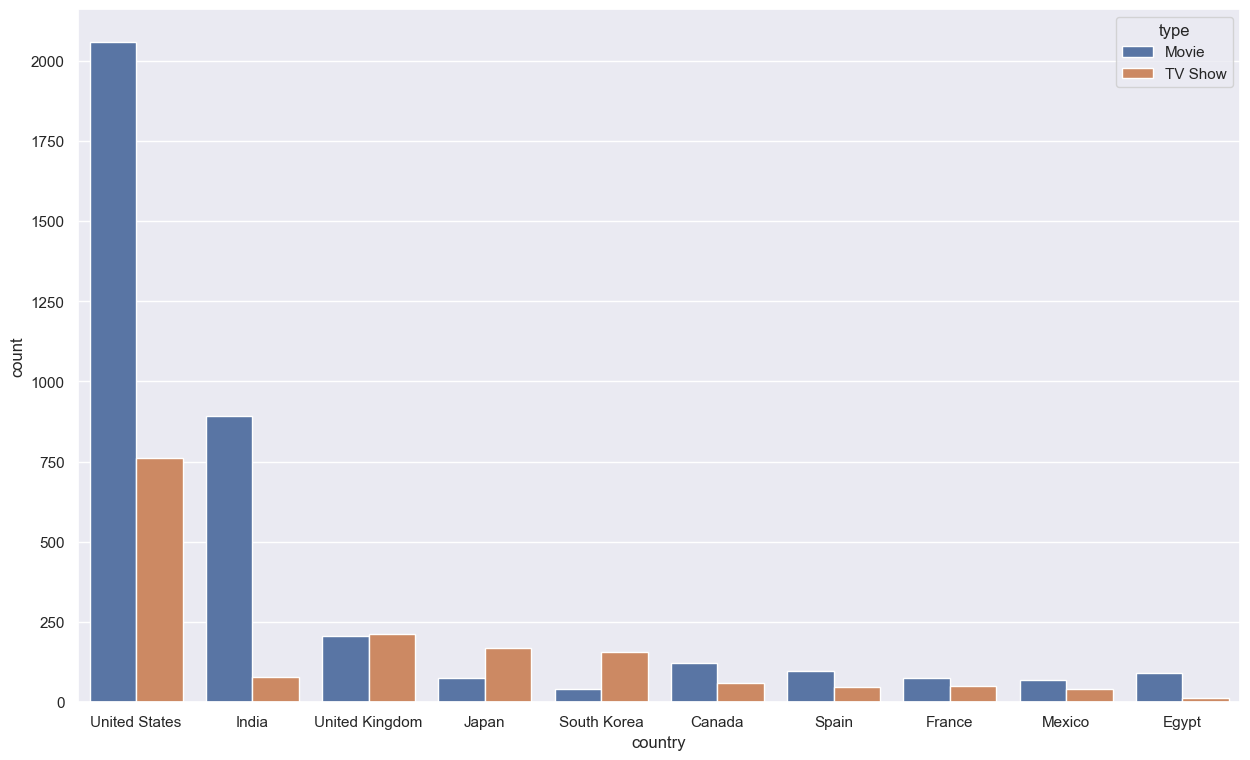

In [52]:
# Top 10 countries of shows in netflix

plt.figure(figsize=(15,9))
country_data = df[df["country"] != "Data Not Available"]
sns.countplot(x="country", data=country_data, order=country_data["country"].value_counts().index[:10], hue="type")
plt.show()

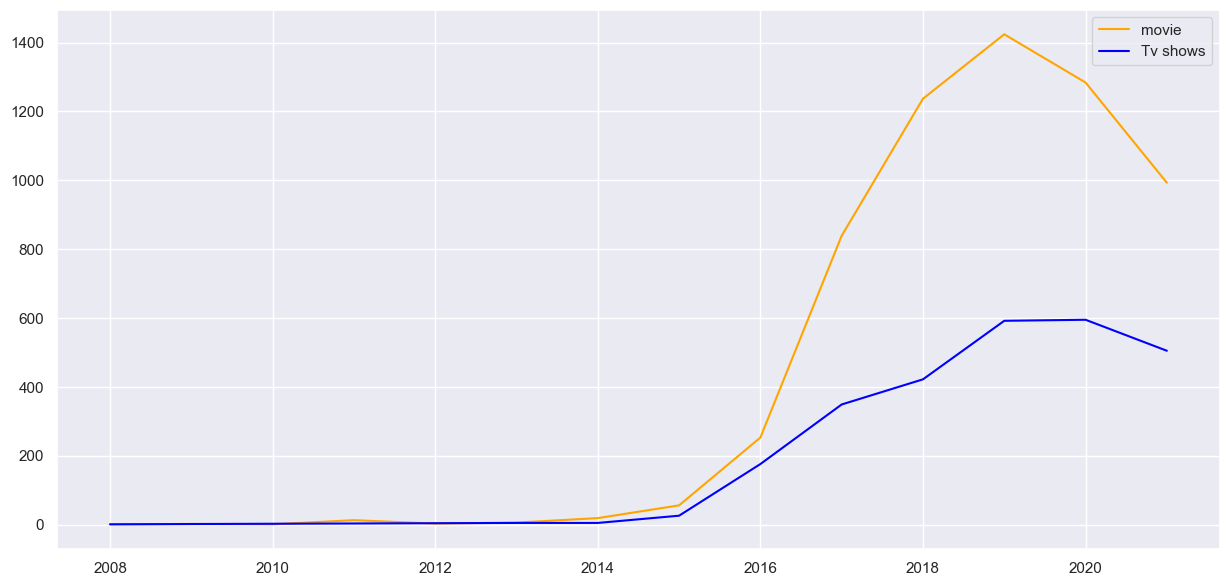

In [21]:
# after 2016 is more tv shows or movies added in netflix?

plt.figure(figsize=(15,7))
movie = df[df["type"] == "Movie"]
tv_shows = df[df["type"] == "TV Show"]
movie_added_total = movie["added_year"].value_counts()
tv_shows_added_total = tv_shows["added_year"].value_counts()

sns.lineplot(x=movie_added_total.index,y=movie_added_total.values, color="orange", label="movie")
sns.lineplot(x=tv_shows_added_total.index,y=tv_shows_added_total.values, color="blue", label="Tv shows")
plt.legend()
plt.show()

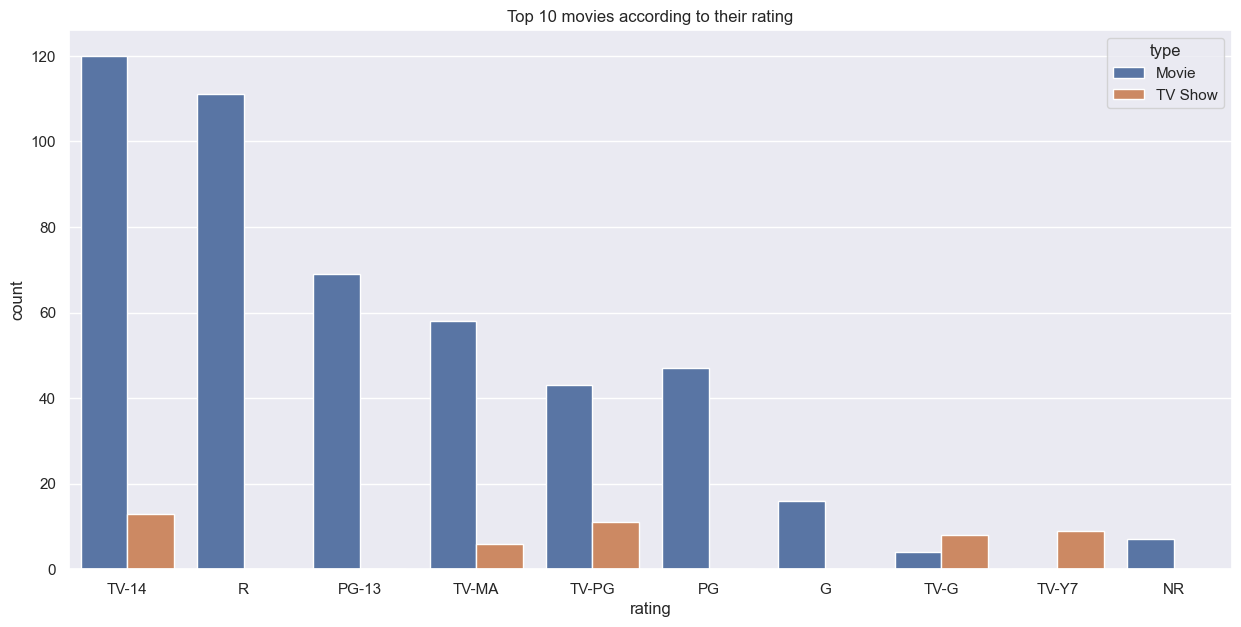

In [22]:
# Top rating movies in the last century

plt.figure(figsize=(15,7))
plt.title("Top 10 movies according to their rating")
movies_before_2000 = df[df["release_year"] < 2000]
sns.countplot(x="rating",data=movies_before_2000,order=movies_before_2000["rating"].value_counts().index[:10],hue="type")
plt.show()

In [23]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Data Not Available', 'TV-Y7-FV', 'UR'], dtype=object)

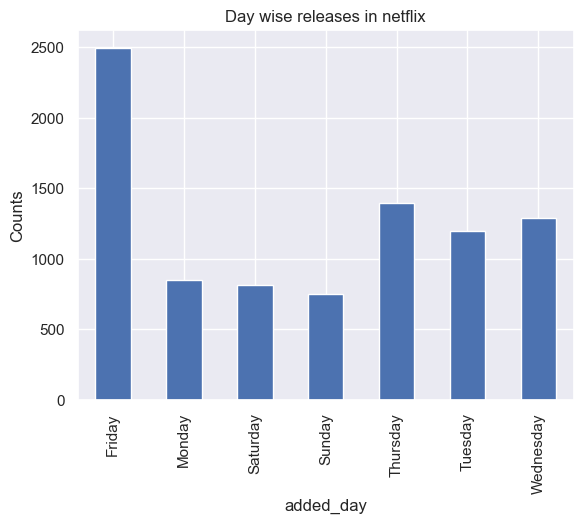

In [24]:
#Popular months with most netflix movies released

months_data = df[df['added_day'] != 'Data Not Available']
months_data =months_data.groupby('added_day')
months_data=months_data.size()
months_data.plot(kind="bar", y=["Type"])
plt.title('Day wise releases in netflix')
plt.ylabel('Counts')
plt.show()

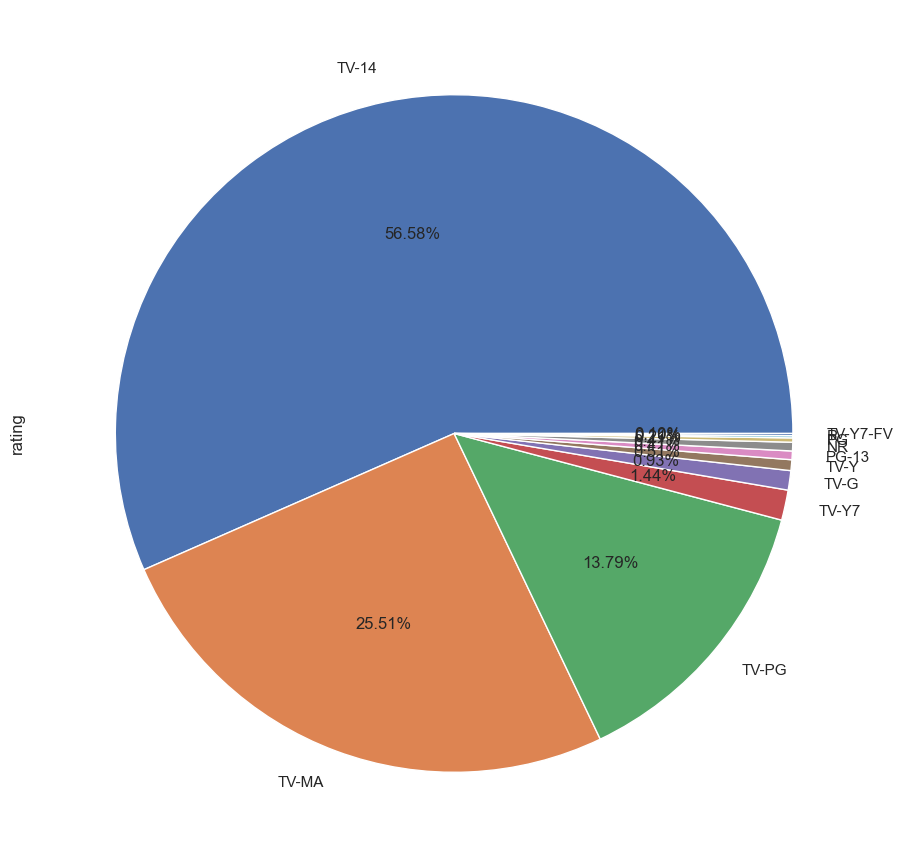

In [25]:
# Top rating indian movies

indian_shows = df[df.country == "India"]
indian_shows
indian_shows['rating'].value_counts().plot.pie(figsize=(11,11), autopct='%1.2f%%')
plt.show()


In [26]:
indian_shows["director"].value_counts()

Data Not Available                 82
David Dhawan                        9
Ram Gopal Varma                     7
Rajkumar Santoshi                   6
Imtiaz Ali                          6
                                   ..
Laxman Utekar                       1
Vinod Kapri                         1
Abhijit Kokate, Srivinay Salian     1
Svati Chakravarty Bhatkal           1
Mozez Singh                         1
Name: director, Length: 646, dtype: int64

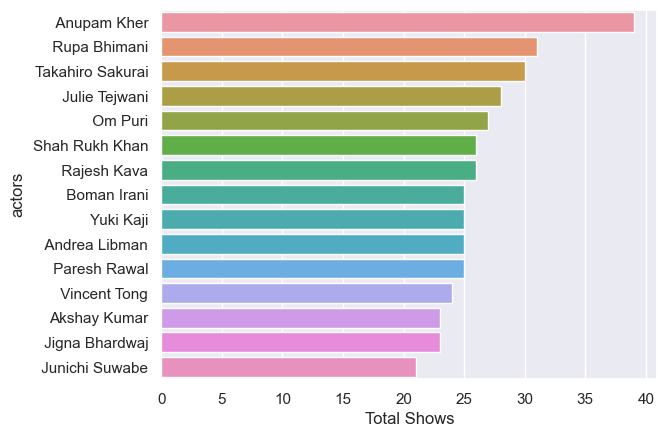

In [27]:
tmp=pd.DataFrame() 
tmp=df['cast'].str.split(',',expand=True).stack().to_frame() 
tmp.columns=['actors']

actor_info=tmp.groupby(['actors']).size().reset_index(name='Total Shows')
actor_info = actor_info[actor_info['actors'] != 'Data Not Available']
actor_info = actor_info.sort_values(by='Total Shows', ascending=False)[:15]
sns.barplot(y='actors', x='Total Shows', data=actor_info)
plt.show()

In [28]:
from pandas_profiling import ProfileReport


from plotly.subplots import make_subplots
import plotly.graph_objects as go


from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px
init_notebook_mode(connected=True)

In [29]:
# missing_count_percent = df.isnull().sum() * 100 / df.shape[0]
# df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
# df_missing_count_percent

In [30]:
# df_missing_count_percent = df_missing_count_percent.reset_index().rename(
#                     columns={
#                             'index':'Column',
#                             0:'Missing_Percentage (%)'
#                     }
#                 )
# df_missing_value = df.isnull().sum()
# df_missing_value = df_missing_value.reset_index().rename(
#                     columns={
#                             'index':'Column',
#                             0:'Missing_value_count'
#                     }
#                 )
# df_missing_count_percent

In [31]:
# df_missing_value

In [32]:
# Final = df_missing_value.merge(df_missing_count_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
# Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
# Final

In [33]:
def missing_pct(df):
  
    missing_count_percent = df.isnull().sum() * 100 / df.shape[0]
    df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
    df_missing_count_percent = df_missing_count_percent.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_Percentage (%)'
                    }
                )
    df_missing_value = df.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_value_count'
                    }
                )
   
    Final = df_missing_value.merge(df_missing_count_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return Final


In [34]:
missing_pct(df)

,Column,Missing_value_count,Missing_Percentage (%)
0,show_id,0,0.0
1,type,0,0.0
2,title,0,0.0
3,director,0,0.0
4,cast,0,0.0
5,country,0,0.0
6,date_added,0,0.0
7,release_year,0,0.0
8,rating,0,0.0
9,duration,0,0.0


In [35]:
df1 = indian_shows.query("type == 'TV Show'")
df1 = df1[["title", "rating"]]
df1 = df1.groupby('rating')["title"].count().reset_index().sort_values('title', ascending = False)
df1 = df1.rename(columns = {"title": "movies_count"})
px.bar(df1, x='rating', y='movies_count', color_discrete_sequence=['grey'],
       title='Tv shows in India w.r.t rating')

In [36]:
df_2 = indian_shows.query("type == 'Movie'")
df_2 = df_2[["title", "rating"]]
df_2 = df_2.groupby(['rating'])["title"].count().reset_index().sort_values('title', ascending = False)
df_2 = df_2.rename(columns = {"title": "movies_count"})
px.bar(df_2, x='rating', y='movies_count', color_discrete_sequence=px.colors.sequential.RdBu,
       title='Movies in India according to their rating ')

In [37]:
df_4 = indian_shows.query("release_year >= 2007")

df_4 = df_4[["type","month",'release_year', "show_id"]]
df_4 = df_4.groupby(['release_year', 'month', 'type'])['show_id'].count().reset_index()
df_4 = df_4.rename(columns = {"show_id": "total_shows"})
df_4 = df_4.groupby(['month', 'type'])['total_shows'].mean().reset_index()

df_4_movie = df_4.query("type == 'Movie'")
df_4_show = df_4.query("type == 'TV Show'")

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=  df_4_movie['month'],
    y= df_4_movie['total_shows'],
    showlegend=True,
    text = df_4_movie['total_shows'], 
    name='Movie',
    marker_color='Maroon'    
    
))
fig.add_trace(go.Scatter(
    x=  df_4_show['month'],
    y= df_4_show['total_shows'],
    showlegend=True,
    text = df_4_show['total_shows'], 
    name='TV Show',
    marker_color='Grey' 
))

fig.update_traces( mode='lines+markers')
fig.update_layout(title_text = 'Movies/TV Shows average release monthly trend' )
fig['layout']['xaxis']['title']='Month'
fig['layout']['yaxis']['title']='No. of movies/Tv Shows'
fig.show()

In [38]:
def trend_yearwise(year):
    
    title = (f'Indian Movies/TV Show release Month Trend for year {year}' )
    df_6 = indian_shows.query("release_year == @year")
    df_6 = df_6.groupby(["type","month"])["show_id"].count().reset_index()
    df_6_movie = df_6.query("type == 'Movie'")
    df_6_show = df_6.query("type == 'TV Show'")
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(
    x=  df_6_movie['month'],
    y= df_6_movie['show_id'],
    showlegend=True,
    text = df_6_movie['show_id'], 
    name='Movie',
    marker_color='Maroon'    

    ))
    fig.add_trace(go.Scatter(
    x=  df_6_show['month'],
    y= df_6_show['show_id'],
    showlegend=True,
    text = df_6_show['show_id'], 
    name='TV Show',
    marker_color='Grey' 
    ))

    fig.update_traces( mode='lines+markers')
    fig.update_layout(title_text =  title )
    fig.show()
    
trend_yearwise(2020)  

In [39]:
indian_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_day,month
4,s5,TV Show,Kota Factory,Data Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,Friday,9
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21 00:00:00,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,Tuesday,9
39,s40,TV Show,Chhota Bheem,Data Not Available,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16 00:00:00,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021,Thursday,9
50,s51,TV Show,Dharmakshetra,Data Not Available,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15 00:00:00,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",2021,Wednesday,9
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,Data Not Available,Data Not Available,India,2021-09-15 00:00:00,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,2021,Wednesday,9


In [40]:
# Saving the imports used in this project
import session_info

session_info.show(write_req_file=True, req_file_name='requirements.txt')